In [ ]:
from google.colab import files
uploaded = files.upload()

Saving final_df_3.csv to final_df_3.csv


In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df_for_modelling = pd.read_csv(io.BytesIO(uploaded['final_df_3.csv']))

Прогнозирование временных рядов для каждого города методом Prophet - сколько ресторанов откроется с мая 2019 года до конца 2019 года

In [ ]:
#подготовка датафремов для моделирования

#Преобразуем данные dateAdded в дату (без времени) для дальнейшей группировки
df_for_modelling['date_add'] = pd.to_datetime(df_for_modelling["dateAdded"], format="%Y/%m/%d")
df_for_modelling['date_add'] = pd.to_datetime(df_for_modelling['date_add']).dt.date

#с помощью метода pandas.get_dummies преобразуем данные по городам
df_for_modelling = pd.concat([df_for_modelling, pd.get_dummies(df_for_modelling.city)], axis = 1)

#сортируем значения по дате для корректного расчета накопительного кол-ва ресторанов при группировке по дате
df_for_modelling=df_for_modelling.sort_values(by=['date_add'],ascending=True)

In [ ]:
#устанавливаем библиотеку Prophet
from prophet import Prophet

In [ ]:
#для каждого города формиурем тренировочную модель для прогнозирования с учетом требований метода и обучаем модель
#период прогнозирования принимаем за разницу дней от последней даты добавления ресторана в городе до конца года

#Birmingham
df_Birmingham_train = df_for_modelling.groupby (df_for_modelling.date_add )['Birmingham'].sum ()
df_Birmingham_train=df_Birmingham_train.cumsum(axis=0)
df_Birmingham_train = df_Birmingham_train.reset_index()
df_Birmingham_train = df_Birmingham_train.rename(columns={"date_add":"ds", "Birmingham":"y"})
model_Birmingham = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=True)
model_Birmingham.fit(df_Birmingham_train)

end_date=pd.to_datetime('2019-12-31',format="%Y-%m-%d")
Birmingham_start_date=pd.to_datetime(df_Birmingham_train['ds'].max(),format="%Y-%m-%d")
Birmingham_delta=(end_date-Birmingham_start_date).days

Birmingham_predict_period = model_Birmingham.make_future_dataframe(periods=Birmingham_delta)
Birmingham_predict_period = Birmingham_predict_period[-Birmingham_delta:]

forecast_Birmingham = model_Birmingham.predict(Birmingham_predict_period)

#Cincinnati
df_Cincinnati_train = df_for_modelling.groupby (df_for_modelling.date_add )['Cincinnati'].sum ()
df_Cincinnati_train = df_Cincinnati_train.cumsum(axis=0)
df_Cincinnati_train = df_Cincinnati_train.reset_index()
df_Cincinnati_train = df_Cincinnati_train.rename(columns={"date_add":"ds", "Cincinnati":"y"})
model_Cincinnati = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=True)
model_Cincinnati.fit(df_Cincinnati_train)

end_date=pd.to_datetime('2019-12-31',format="%Y-%m-%d")
Cincinnati_start_date=pd.to_datetime(df_Cincinnati_train['ds'].max(),format="%Y-%m-%d")
Cincinnati_delta=(end_date-Cincinnati_start_date).days

Cincinnati_predict_period = model_Cincinnati.make_future_dataframe(periods=Cincinnati_delta)
Cincinnati_predict_period = Cincinnati_predict_period[-Cincinnati_delta:]

forecast_Cincinnati = model_Cincinnati.predict(Cincinnati_predict_period)

#Cleveland
df_Cleveland_train = df_for_modelling.groupby (df_for_modelling.date_add )['Cleveland'].sum ()
df_Cleveland_train=df_Cleveland_train.cumsum(axis=0)
df_Cleveland_train = df_Cleveland_train.reset_index()
df_Cleveland_train = df_Cleveland_train.rename(columns={"date_add":"ds", "Cleveland":"y"})
model_Cleveland = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=True)
model_Cleveland.fit(df_Cleveland_train)

end_date=pd.to_datetime('2019-12-31',format="%Y-%m-%d")
Cleveland_start_date=pd.to_datetime(df_Cleveland_train['ds'].max(),format="%Y-%m-%d")
Cleveland_delta=(end_date-Cleveland_start_date).days

Cleveland_predict_period = model_Cleveland.make_future_dataframe(periods=Cleveland_delta)
Cleveland_predict_period = Cleveland_predict_period[-Cleveland_delta:]

forecast_Cleveland = model_Cleveland.predict(Cleveland_predict_period)

#Columbus
df_Columbus_train = df_for_modelling.groupby (df_for_modelling.date_add )['Columbus'].sum ()
df_Columbus_train=df_Columbus_train.cumsum(axis=0)
df_Columbus_train = df_Columbus_train.reset_index()
df_Columbus_train = df_Columbus_train.rename(columns={"date_add":"ds", "Columbus":"y"})
model_Columbus = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=True)
model_Columbus.fit(df_Columbus_train)

end_date=pd.to_datetime('2019-12-31',format="%Y-%m-%d")
Columbus_start_date=pd.to_datetime(df_Columbus_train['ds'].max(),format="%Y-%m-%d")
Columbus_delta=(end_date-Columbus_start_date).days

Columbus_predict_period = model_Columbus.make_future_dataframe(periods=Columbus_delta)
Columbus_predict_period = Columbus_predict_period[-Columbus_delta:]

forecast_Columbus = model_Columbus.predict(Columbus_predict_period)

#Indianapolis
df_Indianapolis_train = df_for_modelling.groupby (df_for_modelling.date_add )['Indianapolis'].sum ()
df_Indianapolis_train=df_Indianapolis_train.cumsum(axis=0)
df_Indianapolis_train = df_Indianapolis_train.reset_index()
df_Indianapolis_train = df_Indianapolis_train.rename(columns={"date_add":"ds", "Indianapolis":"y"})
model_Indianapolis = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=True)
model_Indianapolis.fit(df_Indianapolis_train)

end_date=pd.to_datetime('2019-12-31',format="%Y-%m-%d")
Indianapolis_start_date=pd.to_datetime(df_Indianapolis_train['ds'].max(),format="%Y-%m-%d")
Indianapolis_delta=(end_date-Indianapolis_start_date).days

Indianapolis_predict_period = model_Indianapolis.make_future_dataframe(periods=Indianapolis_delta)
Indianapolis_predict_period = Indianapolis_predict_period[-Indianapolis_delta:]

forecast_Indianapolis = model_Indianapolis.predict(Indianapolis_predict_period)

#Las_Vegas
df_Las_Vegas_train = df_for_modelling.groupby (df_for_modelling.date_add )['Las Vegas'].sum ()
df_Las_Vegas_train=df_Las_Vegas_train.cumsum(axis=0)
df_Las_Vegas_train = df_Las_Vegas_train.reset_index()
df_Las_Vegas_train = df_Las_Vegas_train.rename(columns={"date_add":"ds", "Las Vegas":"y"})
model_Las_Vegas = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=True)
model_Las_Vegas.fit(df_Las_Vegas_train)

end_date=pd.to_datetime('2019-12-31',format="%Y-%m-%d")
Las_Vegas_start_date=pd.to_datetime(df_Las_Vegas_train['ds'].max(),format="%Y-%m-%d")
Las_Vegas_delta=(end_date-Las_Vegas_start_date).days

Las_Vegas_predict_period = model_Las_Vegas.make_future_dataframe(periods=Las_Vegas_delta)
Las_Vegas_predict_period = Las_Vegas_predict_period[-Las_Vegas_delta:]

forecast_Las_Vegas = model_Las_Vegas.predict(Las_Vegas_predict_period)

#Miami
df_Miami_train = df_for_modelling.groupby (df_for_modelling.date_add )['Miami'].sum ()
df_Miami_train=df_Miami_train.cumsum(axis=0)
df_Miami_train = df_Miami_train.reset_index()
df_Miami_train = df_Miami_train.rename(columns={"date_add":"ds", "Miami":"y"})
model_Miami = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=True)
model_Miami.fit(df_Miami_train)

end_date=pd.to_datetime('2019-12-31',format="%Y-%m-%d")
Miami_start_date=pd.to_datetime(df_Miami_train['ds'].max(),format="%Y-%m-%d")
Miami_delta=(end_date-Miami_start_date).days

Miami_predict_period = model_Miami.make_future_dataframe(periods=Miami_delta)
Miami_predict_period = Miami_predict_period[-Miami_delta:]

forecast_Miami = model_Miami.predict(Miami_predict_period)

#Portland
df_Portland_train = df_for_modelling.groupby (df_for_modelling.date_add )['Portland'].sum ()
df_Portland_train=df_Portland_train.cumsum(axis=0)
df_Portland_train = df_Portland_train.reset_index()
df_Portland_train = df_Portland_train.rename(columns={"date_add":"ds", "Portland":"y"})
model_Portland = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=True)
model_Portland.fit(df_Portland_train)

end_date=pd.to_datetime('2019-12-31',format="%Y-%m-%d")
Portland_start_date=pd.to_datetime(df_Portland_train['ds'].max(),format="%Y-%m-%d")
Portland_delta=(end_date-Portland_start_date).days

Portland_predict_period = model_Portland.make_future_dataframe(periods=Portland_delta)
Portland_predict_period = Portland_predict_period[-Portland_delta:]

forecast_Portland = model_Portland.predict(Portland_predict_period)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp83fs0889/3y_18lqs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83fs0889/kv_9up13.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84695', 'data', 'file=/tmp/tmp83fs0889/3y_18lqs.json', 'init=/tmp/tmp83fs0889/kv_9up13.json', 'output', 'file=/tmp/tmp83fs0889/prophet_modelj8doxd07/prophet_model-20230421175737.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:57:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:57:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83fs0889/wz7tfx5k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83fs0889/nr_5jy11.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

In [ ]:
Birmingham_end_2019 = forecast_Birmingham [forecast_Birmingham['ds']==forecast_Birmingham['ds'].max()]  ['yhat'].sum()
Birmingham_start = df_Birmingham_train [df_Birmingham_train['ds']==df_Birmingham_train['ds'].max()]  ['y'].sum()
Birmingham_growth= Birmingham_end_2019 - Birmingham_start

Cincinnati_end_2019 = forecast_Cincinnati [forecast_Cincinnati['ds']==forecast_Cincinnati['ds'].max()]  ['yhat'].sum()
Cincinnati_start = df_Cincinnati_train [df_Cincinnati_train['ds']==df_Cincinnati_train['ds'].max()]  ['y'].sum()
Cincinnati_growth= Cincinnati_end_2019 - Cincinnati_start

Cleveland_end_2019 = forecast_Cleveland [forecast_Cleveland['ds']==forecast_Cleveland['ds'].max()]  ['yhat'].sum()
Cleveland_start = df_Cleveland_train [df_Cleveland_train['ds']==df_Cleveland_train['ds'].max()]  ['y'].sum()
Cleveland_growth= Cleveland_end_2019 - Cleveland_start

Columbus_end_2019 = forecast_Columbus [forecast_Columbus['ds']==forecast_Columbus['ds'].max()]  ['yhat'].sum()
Columbus_start = df_Columbus_train [df_Columbus_train['ds']==df_Columbus_train['ds'].max()]  ['y'].sum()
Columbus_growth= Columbus_end_2019 - Columbus_start

Indianapolis_end_2019 = forecast_Indianapolis [forecast_Indianapolis['ds']==forecast_Indianapolis['ds'].max()]  ['yhat'].sum()
Indianapolis_start = df_Indianapolis_train [df_Indianapolis_train['ds']==df_Indianapolis_train['ds'].max()]  ['y'].sum()
Indianapolis_growth= Indianapolis_end_2019 - Indianapolis_start

Las_Vegas_end_2019 = forecast_Las_Vegas [forecast_Portland['ds']==forecast_Las_Vegas['ds'].max()]  ['yhat'].sum()
Las_Vegas_start = df_Las_Vegas_train [df_Las_Vegas_train['ds']==df_Las_Vegas_train['ds'].max()]  ['y'].sum()
Las_Vegas_growth= Las_Vegas_end_2019 - Las_Vegas_start

Miami_end_2019 = forecast_Miami [forecast_Miami['ds']==forecast_Miami['ds'].max()]  ['yhat'].sum()
Miami_start = df_Miami_train [df_Miami_train['ds']==df_Miami_train['ds'].max()]  ['y'].sum()
Miami_growth= Miami_end_2019 - Miami_start

Portland_end_2019 = forecast_Portland [forecast_Portland['ds']==forecast_Portland['ds'].max()]  ['yhat'].sum()
Portland_start = df_Portland_train [df_Portland_train['ds']==df_Portland_train['ds'].max()]  ['y'].sum()
Portland_growth= Portland_end_2019 - Portland_start


In [ ]:
print('Birmingham_end_2019:',Birmingham_end_2019)
print('Birmingham_start:',Birmingham_start)
print('Birmingham_growth:',Birmingham_growth)

print('Cincinnati_end_2019:',Cincinnati_end_2019)
print('Cincinnati_start:',Cincinnati_start)
print('Cincinnati_growth:',Cincinnati_growth)

print('Cleveland_end_2019:',Cleveland_end_2019)
print('Cleveland_start:',Cleveland_start)
print('Cleveland_growth:',Cleveland_growth)

print('Columbus_end_2019:',Columbus_end_2019)
print('Columbus_start:',Columbus_start)
print('Columbus_growth:',Columbus_growth)

print('Indianapolis_end_2019:',Indianapolis_end_2019)
print('Indianapolis_start:',Indianapolis_start)
print('Indianapolis_growth:',Indianapolis_growth)

print('Las_Vegas_end_2019:',Las_Vegas_end_2019)
print('Las_Vegas_start:',Las_Vegas_start )
print('Las_Vegas_growth:',Las_Vegas_growth)

print('Miami_end_2019:',Miami_end_2019)
print('Miami_start:',Miami_start )
print('Miami_growth:',Miami_growth)

print('Portland_end_2019:',Portland_end_2019)
print('Portland_start:',Portland_start)
print('Portland_growth:',Portland_growth)

Birmingham_end_2019: 68.1144021348581
Birmingham_start: 70
Birmingham_growth: -1.8855978651419036
Cincinnati_end_2019: 92.14158086494709
Cincinnati_start: 86
Cincinnati_growth: 6.1415808649470875
Cleveland_end_2019: 82.65535845580759
Cleveland_start: 83
Cleveland_growth: -0.3446415441924131
Columbus_end_2019: 153.91685910436186
Columbus_start: 151
Columbus_growth: 2.916859104361862
Indianapolis_end_2019: 134.74480510512393
Indianapolis_start: 132
Indianapolis_growth: 2.7448051051239304
Las_Vegas_end_2019: 109.20918000763584
Las_Vegas_start: 131
Las_Vegas_growth: -21.790819992364163
Miami_end_2019: 100.39181597476234
Miami_start: 99
Miami_growth: 1.3918159747623378
Portland_end_2019: 80.14610677038209
Portland_start: 80
Portland_growth: 0.1461067703820902


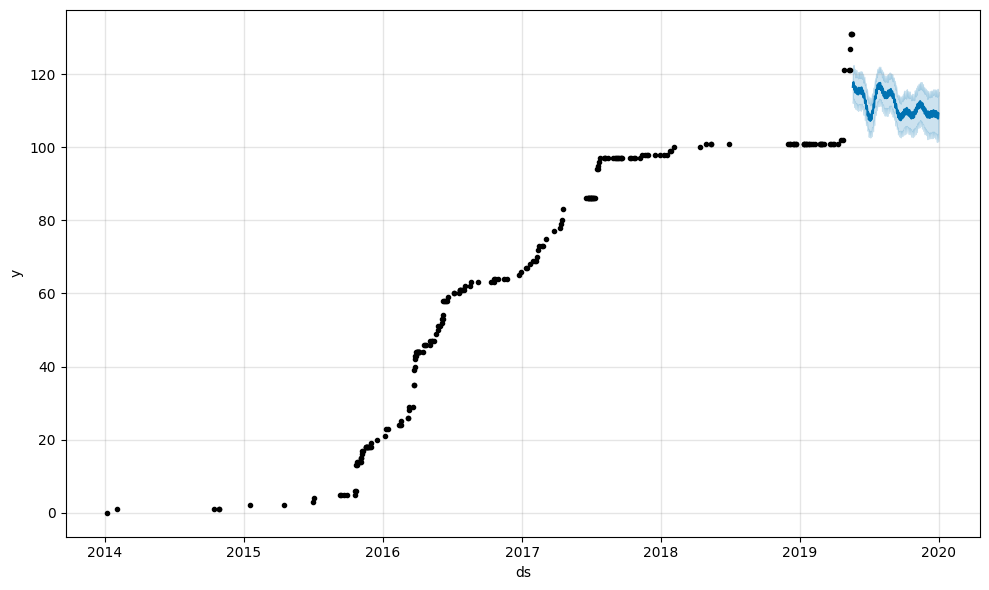

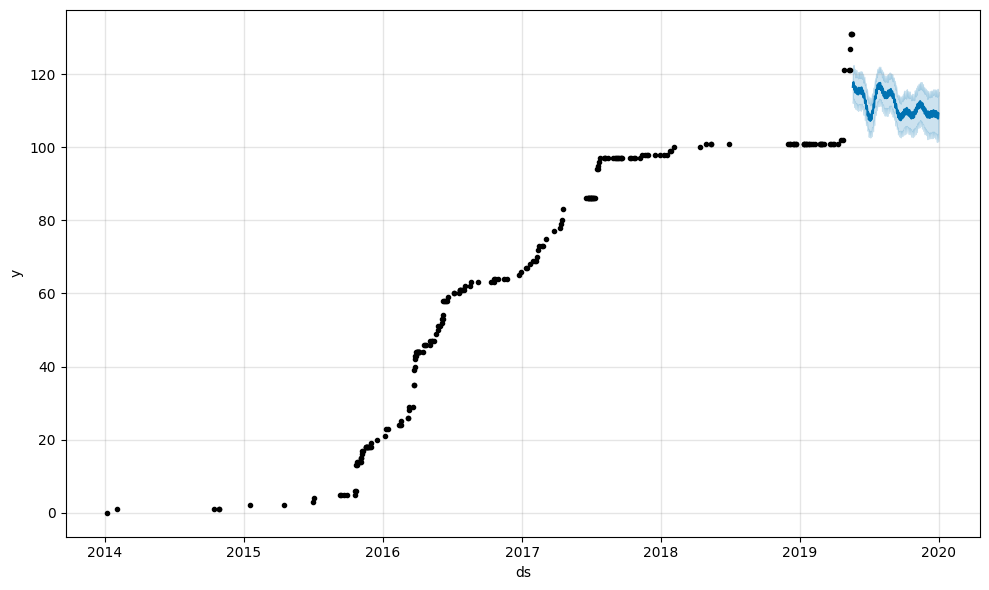

In [ ]:
model_Las_Vegas.plot(forecast_Las_Vegas)

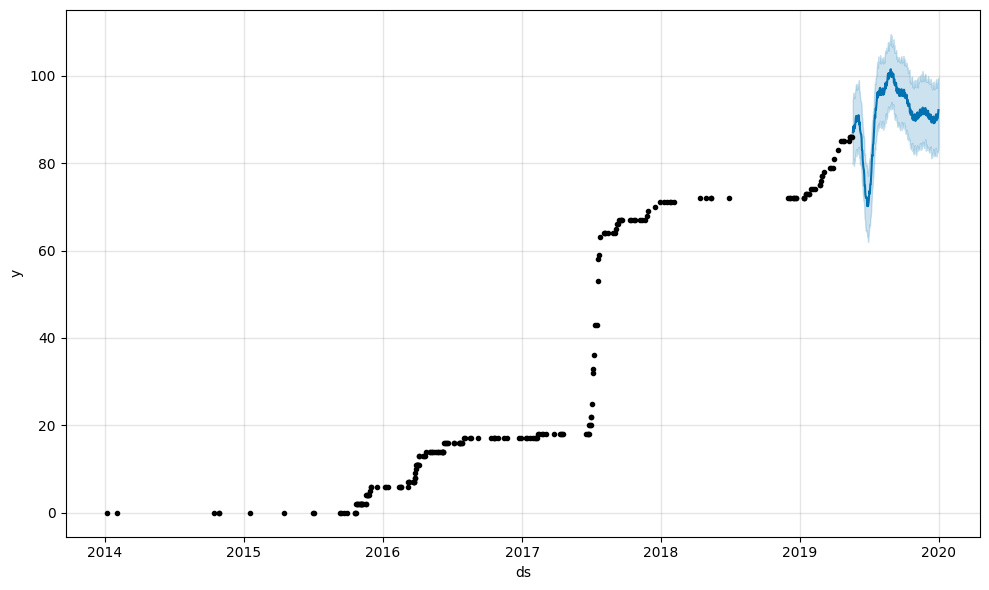

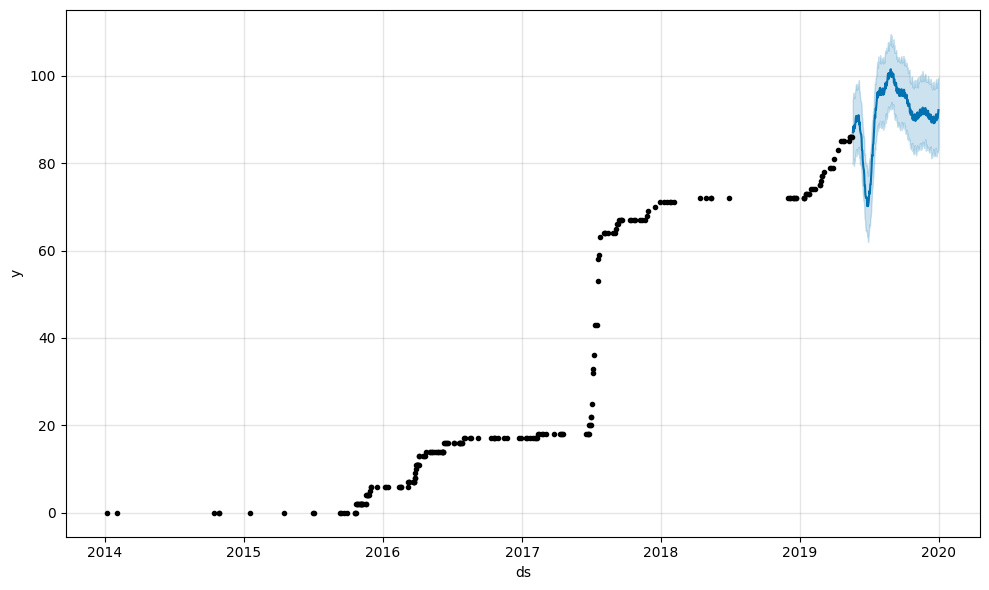

In [ ]:
model_Cincinnati.plot(forecast_Cincinnati)